# Spotify Afrobeats Recommendation System
By Afolabi Cardoso

## Modeling

In this notebook, I explore the features of the Afrobeats playlist. I will see which features give the best clustering. I will also perform a time series analysis of the features to see how they change each year.

#### Imports

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances, cosine_distances, cosine_similarity
from sklearn.decomposition import PCA

from scipy import sparse
import plotly.express as px
import time

#### Import Jack's Playlist

In [143]:
jack= pd.read_csv('../data/jack.csv')
jack.head(2)

,track_uri,track_name,artist_name,artist_info,artist_uri,artist_popularity,artist_genre,album,track_pop,year_released,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,1YzcrcgR3T2RwAZg5tSvYP,Die Walküre / Erster Aufzug: Orchestervorspiel,Richard Wagner,{'external_urls': {'spotify': 'https://open.sp...,1C1x4MVkql8AiABuTw6DgE,58,"['classical', 'german opera', 'german romantic...",Solti - Wagner - The Operas,16,2012-01-01,...,0.1640,113.033,audio_features,1YzcrcgR3T2RwAZg5tSvYP,spotify:track:1YzcrcgR3T2RwAZg5tSvYP,https://api.spotify.com/v1/tracks/1YzcrcgR3T2R...,https://api.spotify.com/v1/audio-analysis/1Yzc...,196000,3,jack
1,6JmduA0I9QYtD1RiHQgWjj,"Götterdämmerung, WWV 86D, Act III: Siegfrieds ...",Richard Wagner,{'external_urls': {'spotify': 'https://open.sp...,1C1x4MVkql8AiABuTw6DgE,58,"['classical', 'german opera', 'german romantic...","Wagner: Götterdämmerung, WWV 86D",3,2018-11-09,...,0.0396,66.858,audio_features,6JmduA0I9QYtD1RiHQgWjj,spotify:track:6JmduA0I9QYtD1RiHQgWjj,https://api.spotify.com/v1/tracks/6JmduA0I9QYt...,https://api.spotify.com/v1/audio-analysis/6Jmd...,409787,3,jack


In [144]:
jack.shape

(13, 29)

#### Import afrobeats playlist

In [145]:
afrobeats = pd.read_csv('../data/afrobeats.csv')
afrobeats.head(2)

,track_uri,track_name,artist_name,artist_info,artist_uri,artist_popularity,artist_genre,album,track_pop,year_released,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,0mDRuZmReEm6DquPLJlcEm,Oleku (feat. Brymo),Ice Prince,{'external_urls': {'spotify': 'https://open.sp...,1sSt1DqqqFLkPwfrqafVyn,54,"['afro dancehall', 'afropop', 'azontobeats', '...",Oleku (feat. Brymo),49,2010-09-21,...,0.751,162.112,audio_features,0mDRuZmReEm6DquPLJlcEm,spotify:track:0mDRuZmReEm6DquPLJlcEm,https://api.spotify.com/v1/tracks/0mDRuZmReEm6...,https://api.spotify.com/v1/audio-analysis/0mDR...,291364.0,5.0,afrobeats
1,1tvi8tv0eykhNcV1WtaIqO,Move Back,5five,{'external_urls': {'spotify': 'https://open.sp...,37zb1JQnDV9dRLatrASEj1,29,"['afro dancehall', 'azonto', 'hiplife']",Move Back,43,2011-04-08,...,0.793,125.032,audio_features,1tvi8tv0eykhNcV1WtaIqO,spotify:track:1tvi8tv0eykhNcV1WtaIqO,https://api.spotify.com/v1/tracks/1tvi8tv0eykh...,https://api.spotify.com/v1/audio-analysis/1tvi...,237107.0,4.0,afrobeats


In [146]:
afrobeats.shape

(1874, 29)

Concat both playlists together

In [147]:
df = pd.concat([afrobeats, jack])

In [148]:
df.reset_index(inplace=True, drop=True)

In [149]:
df.head(2)

,track_uri,track_name,artist_name,artist_info,artist_uri,artist_popularity,artist_genre,album,track_pop,year_released,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,0mDRuZmReEm6DquPLJlcEm,Oleku (feat. Brymo),Ice Prince,{'external_urls': {'spotify': 'https://open.sp...,1sSt1DqqqFLkPwfrqafVyn,54,"['afro dancehall', 'afropop', 'azontobeats', '...",Oleku (feat. Brymo),49,2010-09-21,...,0.751,162.112,audio_features,0mDRuZmReEm6DquPLJlcEm,spotify:track:0mDRuZmReEm6DquPLJlcEm,https://api.spotify.com/v1/tracks/0mDRuZmReEm6...,https://api.spotify.com/v1/audio-analysis/0mDR...,291364.0,5.0,afrobeats
1,1tvi8tv0eykhNcV1WtaIqO,Move Back,5five,{'external_urls': {'spotify': 'https://open.sp...,37zb1JQnDV9dRLatrASEj1,29,"['afro dancehall', 'azonto', 'hiplife']",Move Back,43,2011-04-08,...,0.793,125.032,audio_features,1tvi8tv0eykhNcV1WtaIqO,spotify:track:1tvi8tv0eykhNcV1WtaIqO,https://api.spotify.com/v1/tracks/1tvi8tv0eykh...,https://api.spotify.com/v1/audio-analysis/1tvi...,237107.0,4.0,afrobeats


#### Define the features

In [219]:
features = ['danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

#### Define X

In [220]:
X = df[features]

In [221]:
pipeline = Pipeline([
                    ('scaler', StandardScaler()), 
                    ('kmeans', KMeans(n_clusters=6))
])

pipeline.fit(X)
df['cluster'] = pipeline.predict(X)

#### Using PCA reduce the features into 2 dimentions for better visualization

In [222]:
pipeline_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

In [223]:
pipeline_pca.fit(X)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2))])

In [224]:
pca_df=pd.DataFrame(pipeline_pca.transform(X), columns=['x','y'])

In [225]:
pca_df['genre'] = df['genre']
pca_df['cluster'] = df['cluster']
pca_df['track_name'] = df['track_name']

In [226]:
pca_df.head(2)

,x,y,genre,cluster,track_name
0,-0.038047,2.002695,afrobeats,4,Oleku (feat. Brymo)
1,0.255353,1.748174,afrobeats,5,Move Back


#### Using Plotly to display the data interactively

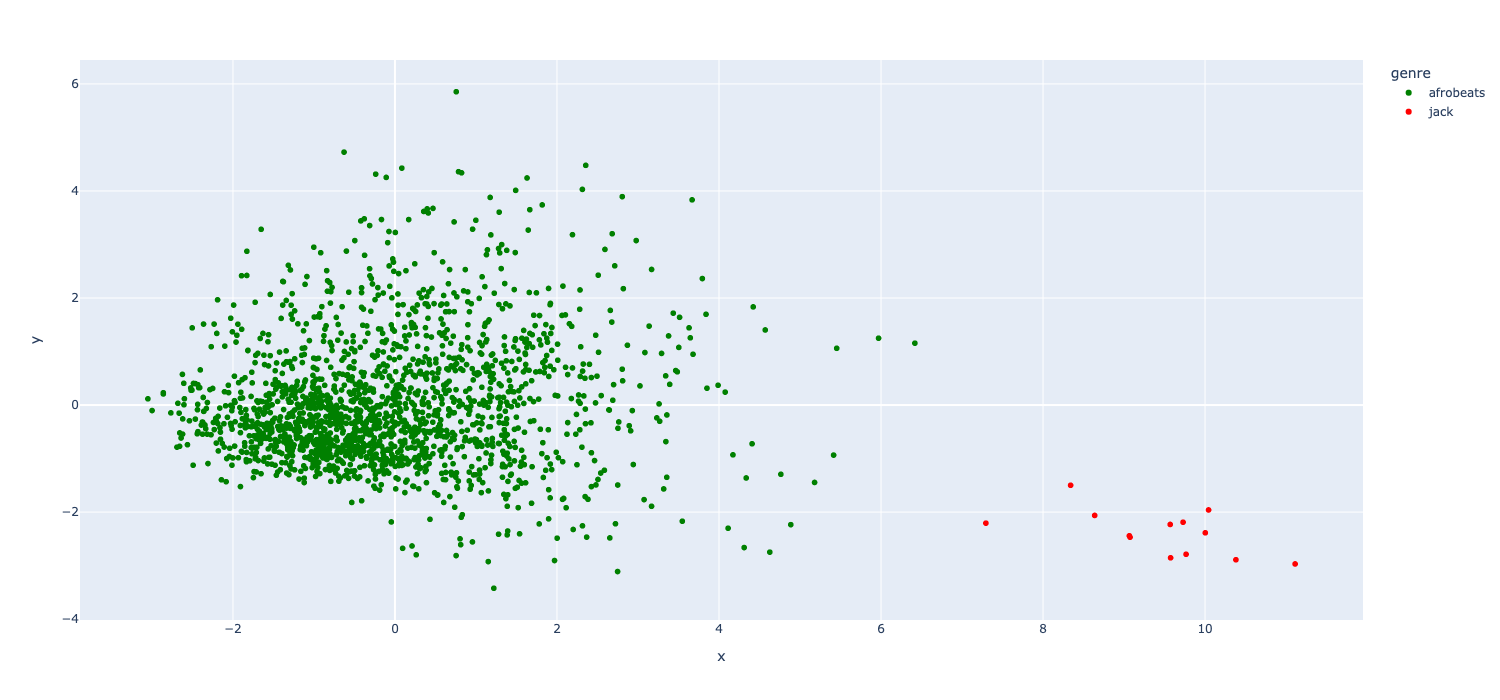

In [227]:
fig = px.scatter(pca_df, x='x', y='y',color='genre',color_discrete_sequence=['green','red'],hover_name='track_name',width=1000, height=700)
fig.show()

#### Using TSNE for dimensionality reduction

In [228]:
pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('tsne', TSNE(n_components=2, verbose=False))
])
X_tnse = pipeline.fit_transform(X)


tsne_df = pd.DataFrame(columns=['x', 'y'], data=X_tnse)
tsne_df['genre'] = df['genre']
tsne_df['cluster'] = df['cluster']
tsne_df['track_name'] = df['track_name']

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [229]:
tsne_df.head()

,x,y,genre,cluster,track_name
0,17.310614,-33.214211,afrobeats,4,Oleku (feat. Brymo)
1,9.887910,0.382398,afrobeats,5,Move Back
2,24.078833,14.118629,afrobeats,3,Pakurumo
3,21.010233,1.778711,afrobeats,5,The Matter (feat. Wizkid)
4,-0.433962,-26.149372,afrobeats,4,Slow Down (feat. Wiz Kid)


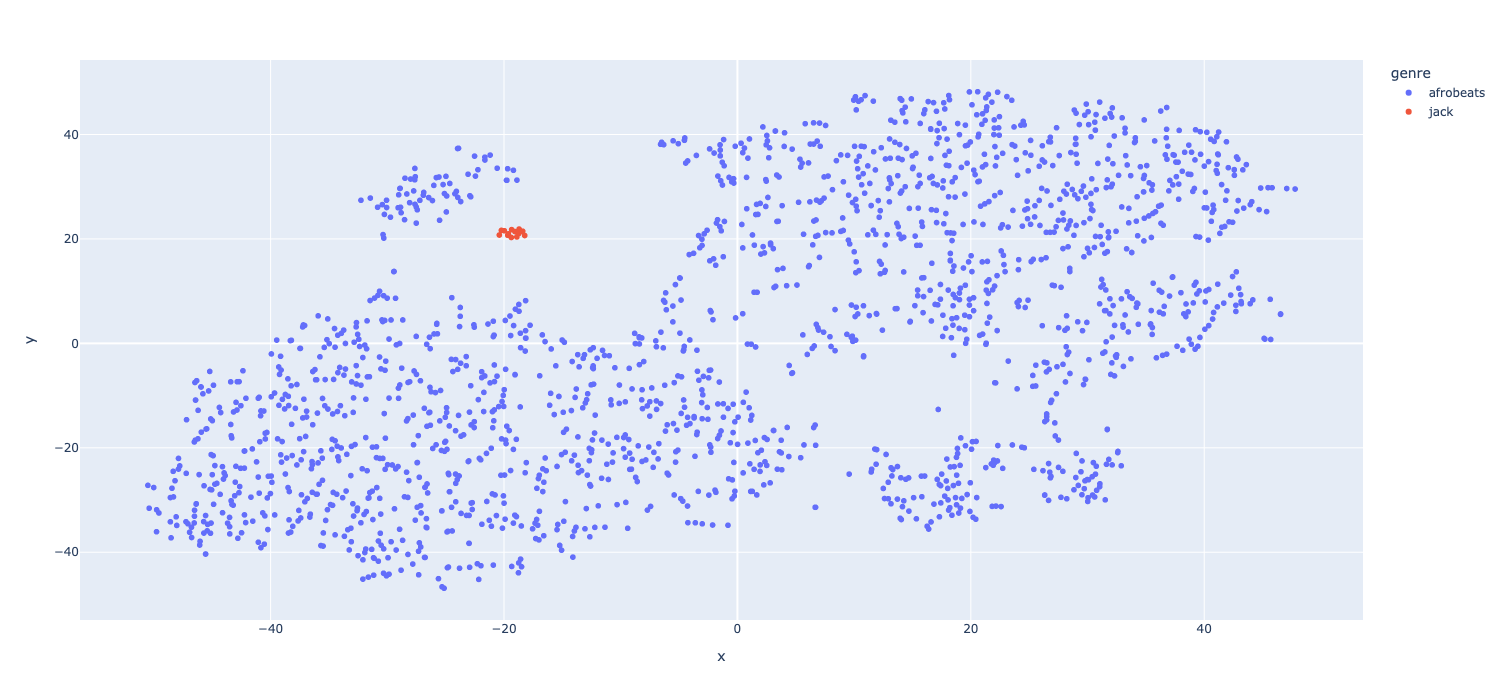

In [230]:
#Using Plotly to display the data interactively
fig = px.scatter(tsne_df, x='x', y='y',color='genre',hover_name='track_name',width=1000, height=700)
fig.show()

TSNE does a better job in maintaining the clusters while reducing the dimesnions

I will use the TSNE dataframe for the cosine similarity

## Cosine similarity

In [231]:
X.head(2)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.544,0.730,-4.299,0.0,0.1440,0.344,0.000001,0.140,0.751,162.112
1,0.793,0.734,-9.252,0.0,0.0981,0.323,0.000002,0.777,0.793,125.032


In [232]:
similarities = cosine_similarity(X)

In [233]:
similarities

array([[1.        , 0.99885823, 0.99977449, ..., 0.98062907, 0.98628217,
        0.97206848],
       [0.99885823, 1.        , 0.99953946, ..., 0.98874936, 0.9929474 ,
        0.98202104],
       [0.99977449, 0.99953946, 1.        , ..., 0.98411871, 0.98912955,
        0.97630926],
       ...,
       [0.98062907, 0.98874936, 0.98411871, ..., 1.        , 0.99944682,
        0.99920585],
       [0.98628217, 0.9929474 , 0.98912955, ..., 0.99944682, 1.        ,
        0.99739915],
       [0.97206848, 0.98202104, 0.97630926, ..., 0.99920585, 0.99739915,
        1.        ]])

#### Create a dataframe of similarities


I will drop rows of data from the playlist we are using to get recommendations 

In [234]:
recommender_df = pd.DataFrame(similarities,
                              columns=df['track_name'],
                             index=df['track_name']).drop(jack['track_name'])

In [235]:
recommender_df[afrobeats['track_name']]

track_name,Oleku (feat. Brymo),Move Back,Pakurumo,The Matter (feat. Wizkid),Slow Down (feat. Wiz Kid),Like to Party,Yahooze,Bumper To Bumper,Dami Duro,Gongo Aso,...,No Wahala,No Wahala,Question (feat. Don Jazzy),Question (feat. Don Jazzy),Peru,Peru,Peru,Le temps,Ozumba Mbadiwe - Remix,Ozumba Mbadiwe - Remix
track_name,,,,,,,,,,,,,,,,,,,,,
Oleku (feat. Brymo),1.000000,0.998858,0.999774,0.999164,0.999987,0.999251,0.999216,0.998757,0.999778,0.999933,...,0.999084,0.997940,0.997943,0.998901,0.998901,0.999303,0.999977,0.999259,0.999362,0.998616
Move Back,0.998858,1.000000,0.999539,0.999910,0.998647,0.999889,0.999903,0.999984,0.997677,0.998740,...,0.999973,0.999813,0.999814,0.999976,0.999976,0.999920,0.998997,0.999942,0.999856,0.999966
Pakurumo,0.999774,0.999539,1.000000,0.999779,0.999683,0.999807,0.999798,0.999463,0.999186,0.999790,...,0.999678,0.998994,0.998996,0.999571,0.999571,0.999791,0.999846,0.999769,0.999873,0.999382
The Matter (feat. Wizkid),0.999164,0.999910,0.999779,1.000000,0.998992,0.999990,0.999992,0.999883,0.998159,0.999162,...,0.999935,0.999700,0.999701,0.999905,0.999905,0.999927,0.999317,0.999942,0.999978,0.999854
Slow Down (feat. Wiz Kid),0.999987,0.998647,0.999683,0.998992,1.000000,0.999085,0.999044,0.998533,0.999862,0.999933,...,0.998888,0.997658,0.997661,0.998685,0.998685,0.999128,0.999948,0.999080,0.999201,0.998379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
No Wahala,0.997940,0.999813,0.998994,0.999700,0.997658,0.999653,0.999686,0.999852,0.996430,0.997891,...,0.999722,1.000000,1.000000,0.999802,0.999802,0.999593,0.998188,0.999631,0.999569,0.999878
Question (feat. Don Jazzy),0.998901,0.999976,0.999571,0.999905,0.998685,0.999892,0.999912,0.999974,0.997730,0.998787,...,0.999987,0.999802,0.999802,1.000000,1.000000,0.999953,0.999036,0.999959,0.999875,0.999970
Peru,0.999977,0.998997,0.999846,0.999317,0.999948,0.999403,0.999369,0.998912,0.999674,0.999936,...,0.999201,0.998188,0.998191,0.999036,0.999036,0.999404,1.000000,0.999364,0.999497,0.998773


#### Create a function to predict top ten Afrobeats songs based on the playlist given

In [236]:
recommender_df['Die Walküre / Erster Aufzug: Orchestervorspiel'].sort_values(ascending=False).index[0:10]

Index(['Do Not Disturb', 'Tuachane', 'Wait For You (feat. Oxlade)', 'Ojoro',
       'Fallen In Love', 'Baby Mi', 'Bad Influence', 'Hello Brother',
       'Hold On', 'Salvation'],
      dtype='object', name='track_name')

In [237]:
def recommend_afrobeats(df,track_names):
    top_ten_df = pd.DataFrame(columns=df.columns)
    top_ten_list = []
    
    #Get song from users playlis
    for track in track_names:
        
        
        for count in range(len(df)): 
            
            most_similar = recommender_df[track].sort_values(ascending=False).index[count]
            
            #check if song has already been recommended
            if most_similar in top_ten_list:
                continue
            
            else:
                top_ten_list.append(most_similar)
                break
                
        #create a dataframe of the recommended songs
        top_ten_df = pd.concat([top_ten_df, df[df['track_name']==most_similar]])
        
    return top_ten_df

In [238]:
recommend_afrobeats(df,jack['track_name'])

,track_uri,track_name,artist_name,artist_info,artist_uri,artist_popularity,artist_genre,album,track_pop,year_released,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,cluster
751,6wj7t9nuC70oPgZ4H1J2hA,Do Not Disturb,Omah Lay,{'external_urls': {'spotify': 'https://open.sp...,5yOvAmpIR7hVxiS6Ls5DPO,73,['afro dancehall'],Do Not Disturb,52,2019-04-09,...,97.297,audio_features,6wj7t9nuC70oPgZ4H1J2hA,spotify:track:6wj7t9nuC70oPgZ4H1J2hA,https://api.spotify.com/v1/tracks/6wj7t9nuC70o...,https://api.spotify.com/v1/audio-analysis/6wj7...,222720.0,4.0,afrobeats,2
700,22J1ZWNO3vwKf49JKBd2pG,Missed Call,Mike Keyz,{'external_urls': {'spotify': 'https://open.sp...,5F7e9W2BhWJ4kCgeM5Czzp,10,['alte'],Missed Call,24,2020-10-02,...,96.021,audio_features,22J1ZWNO3vwKf49JKBd2pG,spotify:track:22J1ZWNO3vwKf49JKBd2pG,https://api.spotify.com/v1/tracks/22J1ZWNO3vwK...,https://api.spotify.com/v1/audio-analysis/22J1...,222500.0,4.0,afrobeats,2
512,6yprUAj991lNqvnbVmR34N,Baby Mi,Djwalz,{'external_urls': {'spotify': 'https://open.sp...,1kkriY46YLjIu947a90gb2,19,[],Baby Mi,7,2018-02-14,...,95.0,audio_features,6yprUAj991lNqvnbVmR34N,spotify:track:6yprUAj991lNqvnbVmR34N,https://api.spotify.com/v1/tracks/6yprUAj991lN...,https://api.spotify.com/v1/audio-analysis/6ypr...,164989.0,4.0,afrobeats,2
550,1djCgiQcqe5JnZS61KYNpD,Level Up (Twice As Tall) [feat. Youssou N'Dour],Burna Boy,{'external_urls': {'spotify': 'https://open.sp...,3wcj11K77LjEY1PkEazffa,79,"['afro dancehall', 'dancehall', 'nigerian hip ...",Twice As Tall,47,2020-08-13,...,85.928,audio_features,1djCgiQcqe5JnZS61KYNpD,spotify:track:1djCgiQcqe5JnZS61KYNpD,https://api.spotify.com/v1/tracks/1djCgiQcqe5J...,https://api.spotify.com/v1/audio-analysis/1djC...,268760.0,4.0,afrobeats,2
883,2MboJofvM4ERzJ9uPtRyaT,Ojoro,Oxlade,{'external_urls': {'spotify': 'https://open.sp...,3WTrdbZU99dgTtt3ZkyamT,60,"['afropop', 'nigerian pop']",Ojoro,19,2018-09-21,...,95.201,audio_features,2MboJofvM4ERzJ9uPtRyaT,spotify:track:2MboJofvM4ERzJ9uPtRyaT,https://api.spotify.com/v1/tracks/2MboJofvM4ER...,https://api.spotify.com/v1/audio-analysis/2Mbo...,213943.0,4.0,afrobeats,2
1363,7HM3WyOHG3Nm6Ck5aZaFKF,Ojoro,Terri,{'external_urls': {'spotify': 'https://open.sp...,6h3iqdnfBKV2jRhUJz0oto,54,['nigerian pop'],Ojoro,50,2020-04-30,...,109.978,audio_features,7HM3WyOHG3Nm6Ck5aZaFKF,spotify:track:7HM3WyOHG3Nm6Ck5aZaFKF,https://api.spotify.com/v1/tracks/7HM3WyOHG3Nm...,https://api.spotify.com/v1/audio-analysis/7HM3...,192000.0,4.0,afrobeats,0
1587,6yx9oXDnT2eCYLvHbM0VBC,Fallen In Love,Chidinma,{'external_urls': {'spotify': 'https://open.sp...,3Wu4rnX6UKAMtTlUL2IAj4,37,"['afropop', 'azontobeats', 'nigerian hip hop']",Fallen In Love,35,2018-04-16,...,112.007,audio_features,6yx9oXDnT2eCYLvHbM0VBC,spotify:track:6yx9oXDnT2eCYLvHbM0VBC,https://api.spotify.com/v1/tracks/6yx9oXDnT2eC...,https://api.spotify.com/v1/audio-analysis/6yx9...,227213.0,4.0,afrobeats,2
752,0xXqVYGvFCGFeFwPzwix3V,Hello Brother,Omah Lay,{'external_urls': {'spotify': 'https://open.sp...,5yOvAmpIR7hVxiS6Ls5DPO,73,['afro dancehall'],Hello Brother,46,2019-05-11,...,95.863,audio_features,0xXqVYGvFCGFeFwPzwix3V,spotify:track:0xXqVYGvFCGFeFwPzwix3V,https://api.spotify.com/v1/tracks/0xXqVYGvFCGF...,https://api.spotify.com/v1/audio-analysis/0xXq...,170031.0,4.0,afrobeats,2
908,3aOVK8gQWtE6syUPbLcz9B,Broken Parts,BenjiFlow,{'external_urls': {'spotify': 'https://open.sp...,3NRpcByltnHx7oZxWbg8Lt,49,"['indie r&b', 'nigerian pop', 'uk alternative ...",BENERGY,15,2020-03-13,...,176.007,audio_features,3aOVK8gQWtE6syUPbLcz9B,spotify:track:3aOVK8gQWtE6syUPbLcz9B,https://api.spotify.com/v1/tracks/3aOVK8gQWtE6...,https://api.spotify.com/v1/audio-analysis/3aOV...,182000.0,4.0,afrobeats,2
950,1OgoSHtTZyMJt3ns3e5Lui,Wait For You (feat. Oxlade),melvitto,{'external_urls': {'spotify': 'https://open.sp...,4Xj0nxVO4r7PLEaw7LRiBa,65,['nigerian pop'],THENIGHTISYOUNG.,63,2019-02-22,...,61.565,audio_features,1OgoSHtTZyMJt3ns3e5Lui,spotify:track:1OgoSHtTZyMJt3ns3e5Lui,https

In [181]:
recommend_afrobeats(df,jack['track_name'])

,track_uri,track_name,artist_name,artist_info,artist_uri,artist_popularity,artist_genre,album,track_pop,year_released,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,cluster
908,3aOVK8gQWtE6syUPbLcz9B,Broken Parts,BenjiFlow,{'external_urls': {'spotify': 'https://open.sp...,3NRpcByltnHx7oZxWbg8Lt,49,"['indie r&b', 'nigerian pop', 'uk alternative ...",BENERGY,15,2020-03-13,...,176.007,audio_features,3aOVK8gQWtE6syUPbLcz9B,spotify:track:3aOVK8gQWtE6syUPbLcz9B,https://api.spotify.com/v1/tracks/3aOVK8gQWtE6...,https://api.spotify.com/v1/audio-analysis/3aOV...,182000.0,4.0,afrobeats,0
883,2MboJofvM4ERzJ9uPtRyaT,Ojoro,Oxlade,{'external_urls': {'spotify': 'https://open.sp...,3WTrdbZU99dgTtt3ZkyamT,60,"['afropop', 'nigerian pop']",Ojoro,19,2018-09-21,...,95.201,audio_features,2MboJofvM4ERzJ9uPtRyaT,spotify:track:2MboJofvM4ERzJ9uPtRyaT,https://api.spotify.com/v1/tracks/2MboJofvM4ER...,https://api.spotify.com/v1/audio-analysis/2Mbo...,213943.0,4.0,afrobeats,0
1363,7HM3WyOHG3Nm6Ck5aZaFKF,Ojoro,Terri,{'external_urls': {'spotify': 'https://open.sp...,6h3iqdnfBKV2jRhUJz0oto,54,['nigerian pop'],Ojoro,50,2020-04-30,...,109.978,audio_features,7HM3WyOHG3Nm6Ck5aZaFKF,spotify:track:7HM3WyOHG3Nm6Ck5aZaFKF,https://api.spotify.com/v1/tracks/7HM3WyOHG3Nm...,https://api.spotify.com/v1/audio-analysis/7HM3...,192000.0,4.0,afrobeats,5
842,5X99Res0qG01SxTy5puWFU,It's Okay to Cry,Yinka Bernie,{'external_urls': {'spotify': 'https://open.sp...,5TuVpSIsvh6lKoKLBsAxFL,33,['nigerian pop'],It's Okay to Cry,46,2020-02-21,...,173.972,audio_features,5X99Res0qG01SxTy5puWFU,spotify:track:5X99Res0qG01SxTy5puWFU,https://api.spotify.com/v1/tracks/5X99Res0qG01...,https://api.spotify.com/v1/audio-analysis/5X99...,213031.0,4.0,afrobeats,0
700,22J1ZWNO3vwKf49JKBd2pG,Missed Call,Mike Keyz,{'external_urls': {'spotify': 'https://open.sp...,5F7e9W2BhWJ4kCgeM5Czzp,10,['alte'],Missed Call,24,2020-10-02,...,96.021,audio_features,22J1ZWNO3vwKf49JKBd2pG,spotify:track:22J1ZWNO3vwKf49JKBd2pG,https://api.spotify.com/v1/tracks/22J1ZWNO3vwK...,https://api.spotify.com/v1/audio-analysis/22J1...,222500.0,4.0,afrobeats,0
992,5Mg5kfEzI7stnjNoXHyaUC,umoya,Blxckie,{'external_urls': {'spotify': 'https://open.sp...,4pQcWzOMSmmz5DK6TqO2FL,56,"['afro soul', 'south african pop', 'south afri...",4LUV,53,2022-02-18,...,169.942,audio_features,5Mg5kfEzI7stnjNoXHyaUC,spotify:track:5Mg5kfEzI7stnjNoXHyaUC,https://api.spotify.com/v1/tracks/5Mg5kfEzI7st...,https://api.spotify.com/v1/audio-analysis/5Mg5...,271018.0,4.0,afrobeats,0
1587,6yx9oXDnT2eCYLvHbM0VBC,Fallen In Love,Chidinma,{'external_urls': {'spotify': 'https://open.sp...,3Wu4rnX6UKAMtTlUL2IAj4,37,"['afropop', 'azontobeats', 'nigerian hip hop']",Fallen In Love,35,2018-04-16,...,112.007,audio_features,6yx9oXDnT2eCYLvHbM0VBC,spotify:track:6yx9oXDnT2eCYLvHbM0VBC,https://api.spotify.com/v1/tracks/6yx9oXDnT2eC...,https://api.spotify.com/v1/audio-analysis/6yx9...,227213.0,4.0,afrobeats,0
746,44mrWZc4dqE9zgqjKFmY00,Questions,Orinayo,{'external_urls': {'spotify': 'https://open.sp...,3lff4dAJpIXlirPPLTabaj,8,[],Questions,21,2020-04-25,...,128.382,audio_features,44mrWZc4dqE9zgqjKFmY00,spotify:track:44mrWZc4dqE9zgqjKFmY00,https://api.spotify.com/v1/tracks/44mrWZc4dqE9...,https://api.spotify.com/v1/audio-analysis/44mr...,225023.0,5.0,afrobeats,0
713,1KFSdaTOpqZXXQk1trlM8y,Still Think of You,melvitto,{'external_urls': {'spotify': 'https://open.sp...,4Xj0nxVO4r7PLEaw7LRiBa,65,['nigerian pop'],Summers,0,2019-11-04,...,190.781,audio_features,1KFSdaTOpqZXXQk1trlM8y,spotify:track:1KFSdaTOpqZXXQk1trlM8y,https://api.spotify.com/v1/tracks/1KFSdaTOpqZX...,https://api.spotify.com/v1/audio-analysis/1KFS...,223812.0,4.0,afrobeats,0
980,4oEVgOzrNz4d6pr8oeXba8,Tuachane,itsYNG,{'external_urls': {'spotify': 'https://open.sp...,3HvDNLE62VQP2DrPsyMXB3,2,[],Tuachane,10,2021-12-09,...,100.058,audio_features,4oEVgOzrNz4d6pr8oeXba8,spotify:track:4oEVgOzrNz4d6pr8oeXba8,https://api.spotify.com/v1/tracks/4oEVgOzrNz4d...,https://api.spotify.com/v1/audio-analy